In [1]:
import os
from glob import glob

import cv2

# Face Detection <a class="tocSkip">

## Demo

In [16]:
# Directory and filepaths
RAW_DIRPATH = './data/raw'

# Get all the filepaths of images in the raw directory path
image_filepaths = glob(RAW_DIRPATH + '/*')

In [17]:
import matplotlib.pyplot as plt

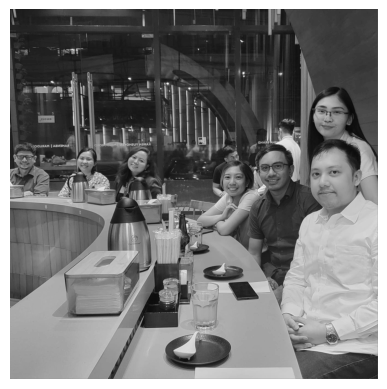

In [20]:
# Read the image then convert to gray scale for the first image
image = cv2.imread(image_filepaths[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots()
ax.imshow(gray, cmap='gray')
ax.axis('off');

In [21]:
# Initialize the cascade model

# Model settings
scaleFactor = 1.2
minNeighbors = 5
minSize = (30, 30)
CASCADE_MODEL_FILEPATH = './haarcascade_frontalface_default.xml'

cascade_model = cv2.CascadeClassifier(CASCADE_MODEL_FILEPATH)

In [22]:
# Use our cascade model to detect faces in the image
faces = cascade_model.detectMultiScale(
    gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize,
    flags=cv2.CASCADE_SCALE_IMAGE)

In [23]:
from matplotlib.patches import Rectangle

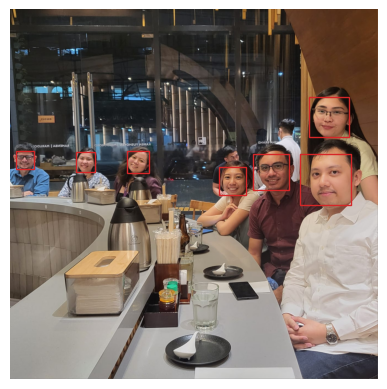

In [24]:
# Plot the bounding box of the detected face by the model
fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for (x, y, width, height) in faces:
    rectangle = Rectangle((x, y), width, height, fill=False, ec='tab:red')
    ax.axis('off')
    ax.add_patch(rectangle)

## Pipeline

In [2]:
# Directory and filepaths
RAW_DIRPATH = './data/raw'
CASCADE_MODEL_FILEPATH = './haarcascade_frontalface_default.xml'
OUTPUT_DIRPATH = './data/processed'

# Model settings
scaleFactor = 1.2
minNeighbors = 5
minSize = (30, 30)
outputSize = (128, 128)

# Create output directory
os.makedirs(OUTPUT_DIRPATH, exist_ok=True)

In [3]:
# Get all the filepaths of images in the raw directory path
image_filepaths = glob(RAW_DIRPATH + '/*')

In [5]:
# Initialize our face detector model
cascade_model = cv2.CascadeClassifier(CASCADE_MODEL_FILEPATH)

# Iterate on to the images found in the RAW_DIRPATH folder
for i, image_filepath in enumerate(image_filepaths):
    # Read the image and convert to gray scale
    image = cv2.imread(image_filepath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the detected faces using the model with specified settings
    faces = cascade_model.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors,
        minSize=minSize, flags=cv2.CASCADE_SCALE_IMAGE)

    # Iterate on each detected faces, crop, then save the cropped image
    # onto an output directory
    for j, (x, y, width, height) in enumerate(faces):
        cropped_image = gray[y:y + height, x:x + width]
        cropped_resized = cv2.resize(cropped_image, outputSize)
        output_filepath = os.path.join(OUTPUT_DIRPATH, f'{i +1 :02}-{j + 1:02}.jpg')
        cv2.imwrite(output_filepath, cropped_resized)